Importing Libraries

In [237]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = plt.rcParamsDefault['font.family']


In [238]:
bgcolor = 'B6D7A8'
textcolor = '274E13'

Reading Xlsx Data

In [239]:
df = pd.read_excel("Tailwind Traders.xlsx")
print(df.shape)
df.info()

(54, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    OrderID             54 non-null     int64  
 1    Customer Name       54 non-null     object 
 2   Product Name         54 non-null     object 
 3   Product Description  54 non-null     object 
 4   Gross Product Price  54 non-null     int64  
 5   Tax Per Product      54 non-null     float64
 6   Quantity Purchased   54 non-null     int64  
 7   Gross Revenue        54 non-null     int64  
 8   Total Tax            54 non-null     float64
 9   Net Revenue          54 non-null     float64
 10  Product Category     54 non-null     object 
 11   SKU Number          54 non-null     object 
 12   Weight              54 non-null     object 
 13   Color               54 non-null     object 
 14   Size                54 non-null     object 
 15   Rating              54 non-null 

Striping Spaces from column headers

In [240]:
df.columns = df.columns.str.strip()

Checking for Nulls/Useful info

In [241]:
df.isnull().sum().any()

np.False_

In [242]:
# Strip leading and trailing spaces from all string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [243]:
df.describe()

,OrderID,Gross Product Price,Tax Per Product,Quantity Purchased,Gross Revenue,Total Tax,Net Revenue,Rating,Stock,Phone,Loyalty Points
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000
mean,1051.000000,107.648148,7.842593,2.814815,209.592593,15.166667,194.425926,4.687037,252.500000,3.535064e+07,22.777778
std,16.171253,85.973264,6.023699,1.518118,90.034693,5.814446,84.573344,0.187381,77.385033,3.265639e+07,12.332908
min,1024.000000,3.000000,1.050000,1.000000,18.000000,5.250000,9.600000,4.000000,85.000000,1.112222e+06,3.000000
25%,1037.250000,49.250000,3.447500,2.000000,141.000000,11.200000,131.130000,4.600000,206.250000,7.781414e+06,15.000000
50%,1051.000000,72.500000,5.775000,3.000000,204.000000,14.700000,189.720000,4.700000,255.000000,2.324253e+07,20.000000
75%,1064.750000,127.500000,11.725000,4.000000,271.500000,19.005000,252.495000,4.800000,310.000000,6.215692e+07,28.000000
max,1078.000000,325.000000,22.750000,6.000000,410.000000,28.700000,381.300000,5.000000,500.000000,9.293200e+07,60.000000


In [244]:
df.nunique()

OrderID                54
Customer Name          54
Product Name           54
Product Description    54
Gross Product Price    50
Tax Per Product        50
Quantity Purchased      6
Gross Revenue          40
Total Tax              43
Net Revenue            41
Product Category       14
SKU Number             54
Weight                 22
Color                   6
Size                    4
Rating                  9
Stock                  35
Country                 5
Sales Rep               4
CustomerID             54
Address                54
Zip Code                3
Phone                  54
Email                  54
Loyalty Points         23
dtype: int64

In [245]:
df['Product Category'].value_counts()

Product Category
Furniture          9
Gardening          8
Home Decor         8
Tools              6
Lighting           5
Plumbing           4
Paint & Decor      2
Hardware           2
Flooring           2
Electronics        2
Outdoor            2
Kitchenware        2
Security           1
Home Essentials    1
Name: count, dtype: int64

In [246]:
df['Country'].value_counts()

Country
USA          14
UK           13
Australia    11
France        8
UAE           8
Name: count, dtype: int64

In [247]:
df['Sales Rep'].value_counts()

Sales Rep
Alice      17
David      13
Bob        12
Charlie    12
Name: count, dtype: int64

In [248]:
df['Color'].value_counts()

Color
Red       12
Green     10
Blue       9
Black      8
White      8
Yellow     7
Name: count, dtype: int64

In [249]:
df['Size'].value_counts()

Size
Small     17
Medium    14
XL        12
Large     11
Name: count, dtype: int64

In [250]:
df['Rating'].value_counts()

Rating
4.7    13
4.8    11
4.6    10
4.9     8
4.5     6
4.4     2
5.0     2
4.2     1
4.0     1
Name: count, dtype: int64

In [251]:
df['Loyalty Points'].value_counts()

Loyalty Points
20    6
28    5
18    5
10    4
15    4
25    3
30    3
22    3
12    3
35    2
45    2
8     2
50    2
5     1
7     1
3     1
14    1
16    1
26    1
60    1
40    1
42    1
24    1
Name: count, dtype: int64

In [252]:
sales_rep_grouped = df.groupby('Sales Rep')[['Gross Revenue', 'Net Revenue','Total Tax','Quantity Purchased']].mean()
print(sales_rep_grouped)

           Gross Revenue  Net Revenue  Total Tax  Quantity Purchased
Sales Rep                                                           
Alice         208.176471   193.110000  15.066471            2.941176
Bob           285.250000   265.282500  19.967500            2.833333
Charlie       147.500000   136.241667  11.258333            2.916667
David         198.923077   184.449231  14.473846            2.538462


In [253]:
colorset = [
    "#6fa8a3",  # Muted Teal
    "#7d8fa6",  # Steel Blue
    "#f08080",  # Light Coral
    "#8fbc8f",  # Soft Olive
    "#d9a6a6",  # Dusty Rose
    "#a9a9a9",  # Warm Gray
    "#2f3e2f",  # Charcoal (text / emphasis)
    "#eef5ea"   # Light card / panel background
]


Net And Gross Revenue per Sales rep

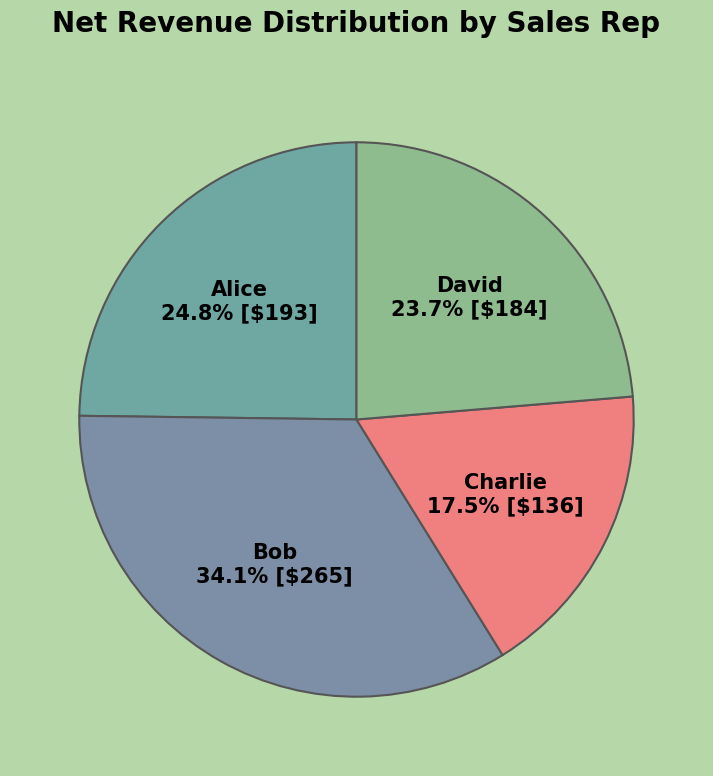

In [254]:
# Data
net_revenue = sales_rep_grouped['Net Revenue']
sales_reps = net_revenue.index
pie_colors = colorset[:len(sales_reps)]
total_revenue = net_revenue.sum()

# Custom autopct function to show % + revenue inside slices
def autopct_label(pct, all_vals, rep_name):
    val = int(round(pct/100.*sum(all_vals)))
    return f"{rep_name}\n{pct:.1f}% [${val:,}]"

# Create figure
fig, ax = plt.subplots(figsize=(9, 9))

wedges, texts, autotexts = ax.pie(
    net_revenue.values,
    labels=None,  # no labels outside
    startangle=90,
    colors=pie_colors,
    wedgeprops={'edgecolor': '#555555', 'linewidth': 1.5},  # dark gray outline
    autopct=lambda pct, vals=net_revenue.values: '',  # placeholder, will set manually
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}
)

# Add custom labels fully inside slices
for i, autotext in enumerate(autotexts):
    rep = sales_reps[i]
    val = net_revenue.values[i]
    pct = val / total_revenue * 100
    autotext.set_text(f"{rep}\n{pct:.1f}% [${val:,.0f}]")
    autotext.set_fontsize(15)
    # autotext.set_fontweight('bold')
    autotext.set_color('black')
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Title
ax.set_title('Net Revenue Distribution by Sales Rep', fontsize=20, fontweight='bold', pad=30)

# Background
fig.patch.set_facecolor(f'#{bgcolor}')
ax.set_facecolor(f'#{bgcolor}')

plt.show()


Customers Per country under each

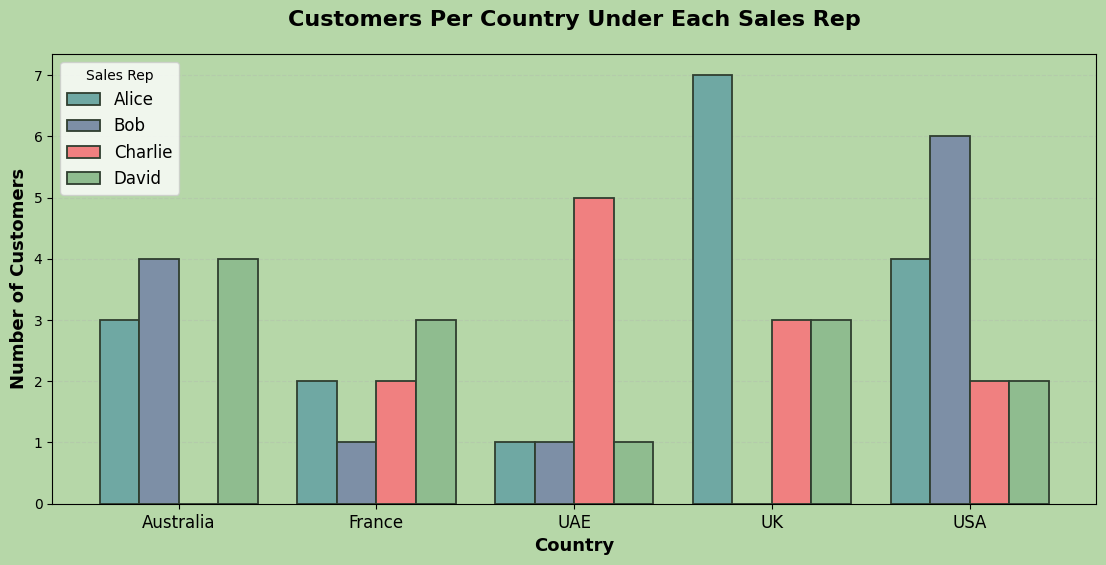

   Sales Rep    Country  Customer Count
0      Alice  Australia               3
1      Alice     France               2
2      Alice        UAE               1
3      Alice         UK               7
4      Alice        USA               4
5        Bob  Australia               4
6        Bob     France               1
7        Bob        UAE               1
8        Bob        USA               6
9    Charlie     France               2
10   Charlie        UAE               5
11   Charlie         UK               3
12   Charlie        USA               2
13     David  Australia               4
14     David     France               3
15     David        UAE               1
16     David         UK               3
17     David        USA               2

Pivot Summary:
Sales Rep  Alice  Bob  Charlie  David
Country                              
Australia    3.0  4.0      0.0    4.0
France       2.0  1.0      2.0    3.0
UAE          1.0  1.0      5.0    1.0
UK           7.0  0.0      3.0    

In [255]:
# Group by Sales Rep and Country to count customers
customers_per_country_sales_rep = df.groupby(['Sales Rep', 'Country'])['Customer Name'].count().reset_index()
customers_per_country_sales_rep.columns = ['Sales Rep', 'Country', 'Customer Count']

# Create a pivot table for easier plotting
pivot_data = customers_per_country_sales_rep.pivot(index='Country', columns='Sales Rep', values='Customer Count').fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot grouped bars
x_pos = np.arange(len(pivot_data.index))
bar_width = 0.2

for i, sales_rep in enumerate(pivot_data.columns):
    ax.bar(
        x_pos + i*bar_width, 
        pivot_data[sales_rep], 
        width=bar_width, 
        label=sales_rep,
        color=colorset[i % len(colorset)],
        edgecolor='#2f3e2f',
        linewidth=1.3
    )

# Customize the plot
ax.set_xlabel('Country', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=13, fontweight='bold')
ax.set_title('Customers Per Country Under Each Sales Rep', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos + bar_width * 1.5)
ax.set_xticklabels(pivot_data.index, fontsize=12)
ax.legend(fontsize=12, title='Sales Rep')

# Background styling
fig.patch.set_facecolor(f'#{bgcolor}')
ax.set_facecolor(f'#{bgcolor}')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.15)
plt.show()

# Display the data
print(customers_per_country_sales_rep)
print("\nPivot Summary:")
print(pivot_data)

In [256]:
df['Color'] = df['Color'].str.strip()

In [257]:
df['Color'].unique()

array(['Red', 'Blue', 'Green', 'Black', 'White', 'Yellow'], dtype=object)

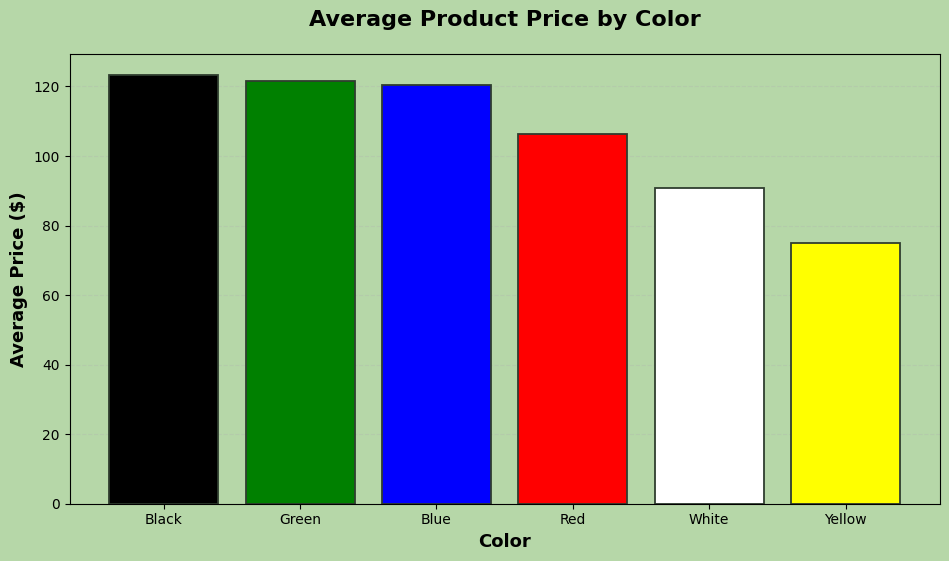

Average Price by Color:
Color
Black     123.250000
Green     121.600000
Blue      120.333333
Red       106.333333
White      90.875000
Yellow     75.000000
Name: Gross Product Price, dtype: float64


In [258]:
# Group by Color and calculate average price
avg_price_by_color = df.groupby('Color')['Gross Product Price'].mean().sort_values(ascending=False)

# Create a color mapping for bars (use actual colors for each bar)
color_map = {
    'Black': '#000000',
    'Red': '#FF0000',
    'Blue': '#0000FF',
    'Green': '#008000',
    'White': '#FFFFFF',
    'Yellow': '#FFFF00'
}

# Map colors to the bar chart
bar_colors = [color_map.get(color, '#808080') for color in avg_price_by_color.index]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with actual colors
bars = ax.bar(
    avg_price_by_color.index, 
    avg_price_by_color.values,
    color=bar_colors,
    edgecolor='#2f3e2f',
    linewidth=1.3
)

# Customize the plot
ax.set_xlabel('Color', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Price ($)', fontsize=13, fontweight='bold')
ax.set_title('Average Product Price by Color', fontsize=16, fontweight='bold', pad=20)

# Background styling
fig.patch.set_facecolor(f'#{bgcolor}')
ax.set_facecolor(f'#{bgcolor}')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.15)
plt.show()

# Display the data
print("Average Price by Color:")
print(avg_price_by_color)

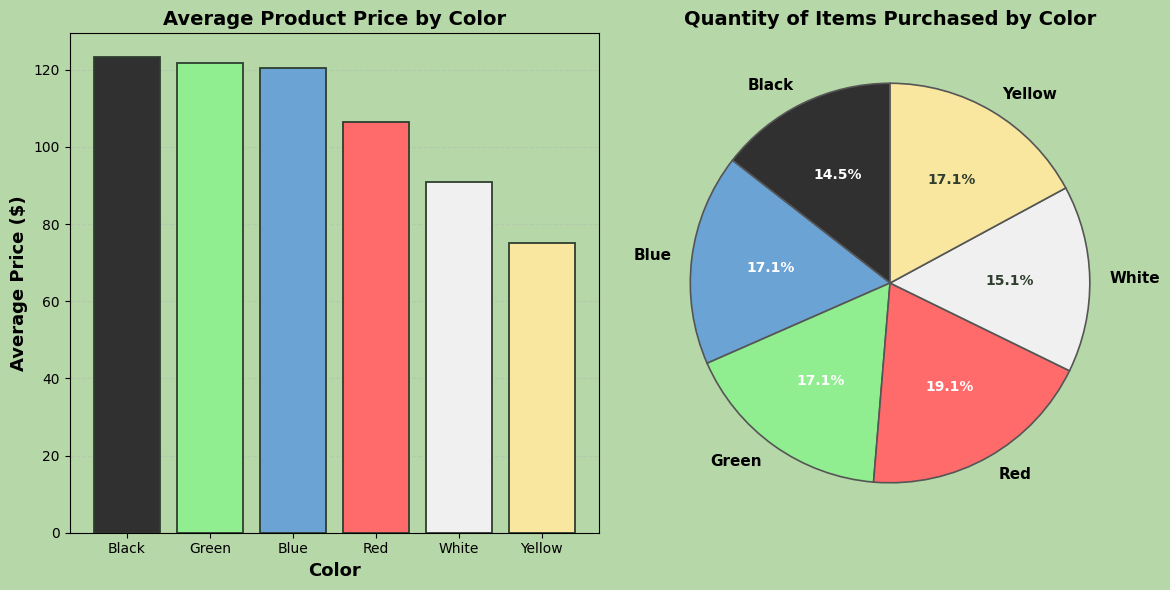

Average Price by Color:
Color
Black     123.250000
Green     121.600000
Blue      120.333333
Red       106.333333
White      90.875000
Yellow     75.000000
Name: Gross Product Price, dtype: float64

Quantity of Items Purchased by Color:
Color
Black     22
Blue      26
Green     26
Red       29
White     23
Yellow    26
Name: Quantity Purchased, dtype: int64


In [259]:
# Create subplots: bar chart and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ===== SUBPLOT 1: Bar Chart for Average Price by Color =====
# Create lighter shades for bars
lighter_color_map = {
    'Black': '#303030',
    'Red': '#FF6B6B',
    'Blue': '#6BA3D4',
    'Green': '#90EE90',
    'White': '#F0F0F0',
    'Yellow': '#f9e79f'
}

bar_colors_light = [lighter_color_map.get(color, '#C0C0C0') for color in avg_price_by_color.index]

bars = ax1.bar(
    avg_price_by_color.index, 
    avg_price_by_color.values,
    color=bar_colors_light,
    edgecolor='#2f3e2f',
    linewidth=1.3
)

ax1.set_xlabel('Color', fontsize=13, fontweight='bold')
ax1.set_ylabel('Average Price ($)', fontsize=13, fontweight='bold')
ax1.set_title('Average Product Price by Color', fontsize=14, fontweight='bold')
ax1.set_facecolor(f'#{bgcolor}')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# ===== SUBPLOT 2: Pie Chart for Quantity of Items per Color =====
quantity_by_color = df.groupby('Color')['Quantity Purchased'].sum()

# Use the same color map as bar chart
pie_colors = [lighter_color_map.get(color, '#808080') for color in quantity_by_color.index]

wedges, texts, autotexts = ax2.pie(
    quantity_by_color.values,
    labels=quantity_by_color.index,
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'},
    wedgeprops={'edgecolor': '#555555', 'linewidth': 1.2}
)

ax2.set_title('Quantity of Items Purchased by Color', fontsize=14, fontweight='bold')

# Style autotext: white unless slice is very light (e.g., White)
for i, autotext in enumerate(autotexts):
    slice_color = pie_colors[i].lower()
    if slice_color in ['#f0f0f0', '#ffff00', '#f9e79f']:  # light colors
        autotext.set_color('#2f3e2f')  # dark green text for contrast
    else:
        autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(10)

# Set background
fig.patch.set_facecolor(f'#{bgcolor}')

plt.tight_layout()
plt.show()

print("Average Price by Color:")
print(avg_price_by_color)
print("\nQuantity of Items Purchased by Color:")
print(quantity_by_color)


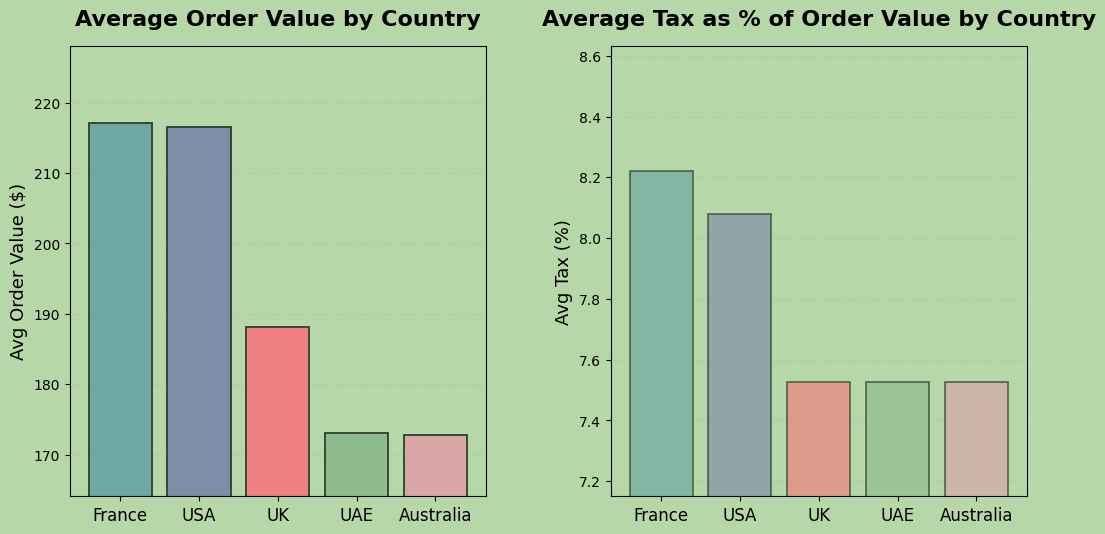

In [260]:
# Data preparation
country_metrics = df.groupby('Country').agg({
    'Net Revenue': 'mean',
    'Total Tax': 'mean'
}).rename(columns={'Net Revenue': 'Avg Order Value', 'Total Tax': 'Avg Tax'}).sort_values('Avg Order Value', ascending=False)

countries = country_metrics.index
avg_order_values = country_metrics['Avg Order Value']

# Compute Tax % of Net Revenue
avg_tax_percent = (country_metrics['Avg Tax'] / country_metrics['Avg Order Value']) * 100

# Assign a distinct color to each country
country_colors = dict(zip(countries, colorset[:len(countries)]))
bar_colors = [country_colors[country] for country in countries]

x = np.arange(len(countries))
bar_width = 0.8

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

# ===== SUBPLOT 1: Average Order Value =====
bars1 = ax1.bar(
    x, avg_order_values, width=bar_width,
    color=bar_colors, edgecolor='#2f3e2f', linewidth=1.3
)
ax1.set_xticks(x)
ax1.set_xticklabels(countries, fontsize=12)
ax1.set_ylabel('Avg Order Value ($)', fontsize=13)
ax1.set_title('Average Order Value by Country', fontsize=16, fontweight='bold', pad=15)
ax1.set_facecolor(f'#{bgcolor}')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

min_y1, max_y1 = avg_order_values.min(), avg_order_values.max()
ax1.set_ylim(min_y1 * 0.95, max_y1 * 1.05)

# ===== SUBPLOT 2: Tax Percentage =====
bars2 = ax2.bar(
    x, avg_tax_percent, width=bar_width,
    color=bar_colors, edgecolor='#2f3e2f', linewidth=1.3, alpha=0.7
)
ax2.set_xticks(x)
ax2.set_xticklabels(countries, fontsize=12)
ax2.set_ylabel('Avg Tax (%)', fontsize=13)
ax2.set_title('Average Tax as % of Order Value by Country', fontsize=16, fontweight='bold', pad=15)
ax2.set_facecolor(f'#{bgcolor}')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

min_y2, max_y2 = avg_tax_percent.min(), avg_tax_percent.max()
ax2.set_ylim(min_y2 * 0.95, max_y2 * 1.05)

# Background for figure
fig.patch.set_facecolor(f'#{bgcolor}')

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.15, wspace=0.3)
plt.show()


In [261]:
# Group by country and calculate average tax percentage (Total Tax / Net Revenue * 100)
country_avg_tax_pct = df.groupby('Country').apply(
    lambda g: (g['Total Tax'].sum() / g['Net Revenue'].sum()) * 100
).sort_values(ascending=False)

print("Average Tax Percentage by Country:")
print(country_avg_tax_pct)

Average Tax Percentage by Country:
Country
France       8.220124
USA          8.077980
Australia    7.526882
UAE          7.526882
UK           7.526882
dtype: float64


C:\Users\yabh3\AppData\Local\Temp\ipykernel_27604\2289973454.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_avg_tax_pct = df.groupby('Country').apply(


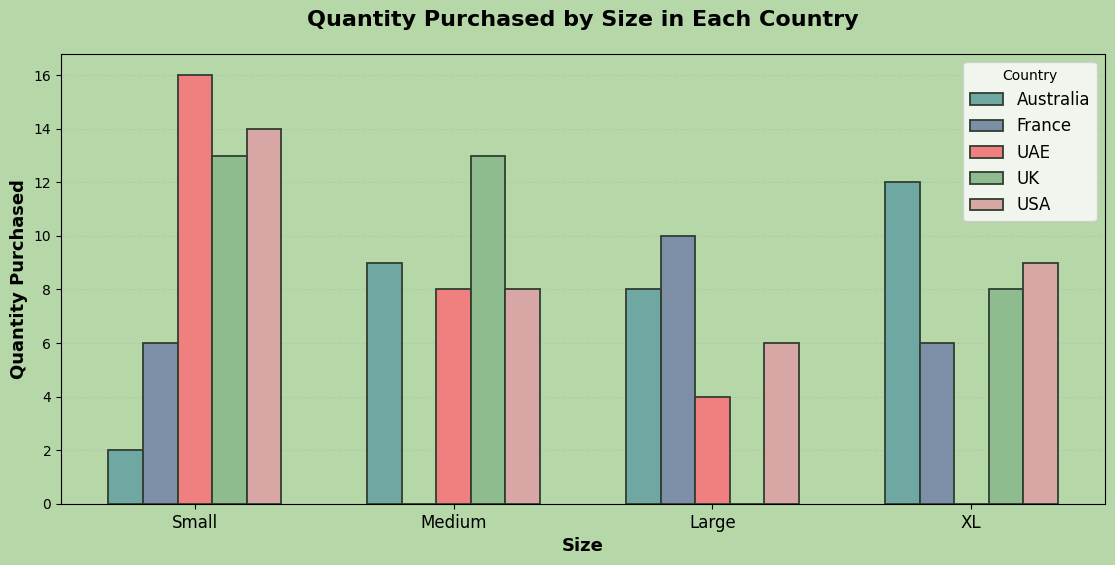

Quantity Purchased by Size and Country:
Country  Australia  France   UAE    UK   USA
Size                                        
Small          2.0     6.0  16.0  13.0  14.0
Medium         9.0     0.0   8.0  13.0   8.0
Large          8.0    10.0   4.0   0.0   6.0
XL            12.0     6.0   0.0   8.0   9.0


In [262]:
# Group by Country and Size to count quantity purchased
size_by_country = df.groupby(['Country', 'Size'])['Quantity Purchased'].sum().reset_index()

# Create a pivot table for easier plotting
pivot_size_data = size_by_country.pivot(index='Size', columns='Country', values='Quantity Purchased').fillna(0)

# Define size order
size_order = ['Small', 'Medium', 'Large', 'XL']
pivot_size_data = pivot_size_data.reindex([s for s in size_order if s in pivot_size_data.index])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot grouped bars
# x_pos = np.arange(len(pivot_size_data.index))
x_pos = np.arange(len(pivot_size_data.index)) * 1.5  # add spacing between groups

bar_width = 0.2

for i, country in enumerate(pivot_size_data.columns):
    ax.bar(
        x_pos + i*bar_width, 
        pivot_size_data[country], 
        width=bar_width, 
        label=country,
        color=colorset[i % len(colorset)],
        edgecolor='#2f3e2f',
        linewidth=1.3
    )

# Customize the plot
ax.set_xlabel('Size', fontsize=13, fontweight='bold')
ax.set_ylabel('Quantity Purchased', fontsize=13, fontweight='bold')
ax.set_title('Quantity Purchased by Size in Each Country', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos + bar_width * 2)
ax.set_xticklabels(pivot_size_data.index, fontsize=12)
ax.legend(fontsize=12, title='Country')

# Background styling
fig.patch.set_facecolor(f'#{bgcolor}')
ax.set_facecolor(f'#{bgcolor}')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.15)
plt.show()

# Display the data
print("Quantity Purchased by Size and Country:")
print(pivot_size_data)

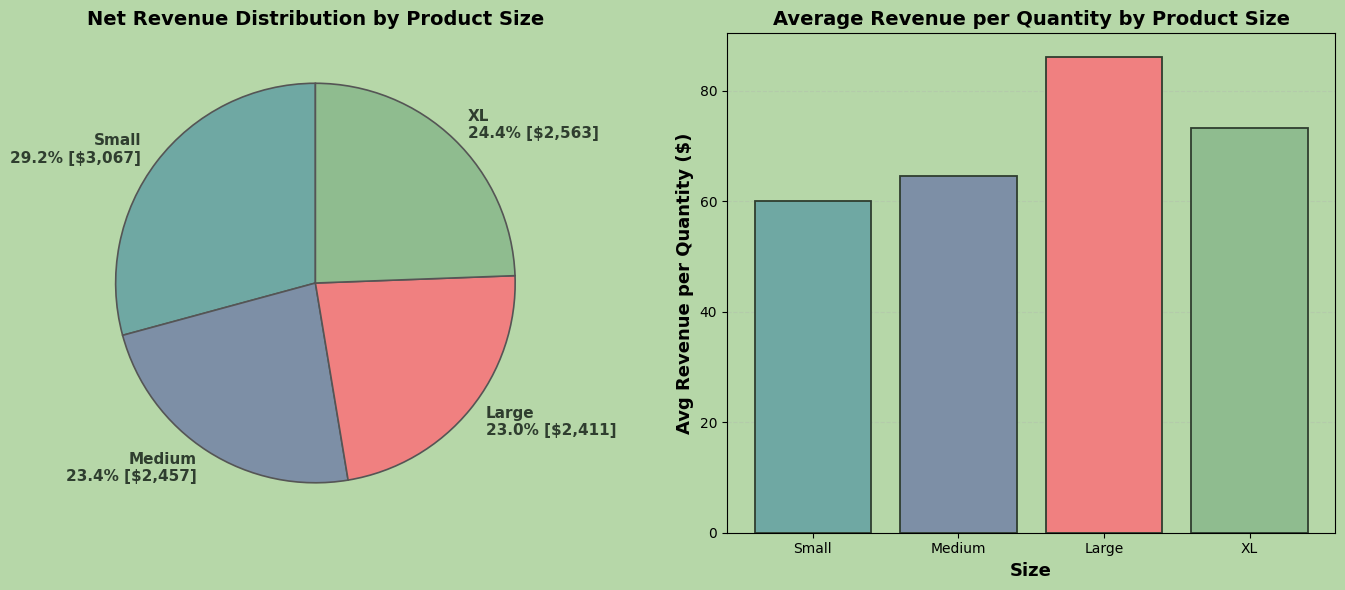

Revenue by Size:
     Size  Net Revenue  Quantity Purchased  Avg Revenue per Qty
2   Small      3067.41                  51            60.145294
1  Medium      2457.06                  38            64.659474
0   Large      2411.45                  28            86.123214
3      XL      2563.08                  35            73.230857


In [265]:
# Group by Size and calculate metrics
revenue_by_size = df.groupby('Size').agg({
    'Net Revenue': 'sum',
    'Quantity Purchased': 'sum'
}).reset_index()

# Calculate Average Revenue per Quantity
revenue_by_size['Avg Revenue per Qty'] = revenue_by_size['Net Revenue'] / revenue_by_size['Quantity Purchased']

# Sort by size order
size_order = ['Small', 'Medium', 'Large', 'XL']
revenue_by_size['Size'] = pd.Categorical(revenue_by_size['Size'], categories=size_order, ordered=True)
revenue_by_size = revenue_by_size.sort_values('Size')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ===== SUBPLOT 1: Pie Chart for Net Revenue by Size =====
pie_colors_size = colorset[:len(revenue_by_size)]
total_net = revenue_by_size['Net Revenue'].sum()

# Custom labels inside slices
def make_label(size, val, total):
    pct = val / total * 100
    return f"{size}\n{pct:.1f}% [${val:,.0f}]"

labels = [make_label(sz, val, total_net) 
          for sz, val in zip(revenue_by_size['Size'], revenue_by_size['Net Revenue'])]

# Pie chart (all text inside)
wedges, texts = ax1.pie(
    revenue_by_size['Net Revenue'],
    labels=labels,
    startangle=90,
    colors=pie_colors_size,
    wedgeprops={'edgecolor': '#555555', 'linewidth': 1.2},  # dark gray border
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#2f3e2f'}  # same color for all
)

ax1.set_title('Net Revenue Distribution by Product Size', fontsize=14, fontweight='bold')

# Optional: adjust font size for all labels if needed
for text in texts:
    text.set_fontsize(11)
    text.set_color('#2f3e2f')  # ensure same color

# ===== SUBPLOT 2: Bar Chart for Average Revenue per Quantity by Size =====
bars = ax2.bar(
    revenue_by_size['Size'],
    revenue_by_size['Avg Revenue per Qty'],
    color=pie_colors_size,
    edgecolor='#2f3e2f',
    linewidth=1.3
)

ax2.set_xlabel('Size', fontsize=13, fontweight='bold')
ax2.set_ylabel('Avg Revenue per Quantity ($)', fontsize=13, fontweight='bold')
ax2.set_title('Average Revenue per Quantity by Product Size', fontsize=14, fontweight='bold')
ax2.set_facecolor(f'#{bgcolor}')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Set background for figure
fig.patch.set_facecolor(f'#{bgcolor}')

plt.tight_layout()
plt.show()

print("Revenue by Size:")
print(revenue_by_size)


C:\Users\yabh3\AppData\Local\Temp\ipykernel_27604\521036192.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_revenue.index, rotation=30, ha='right', fontsize=12)


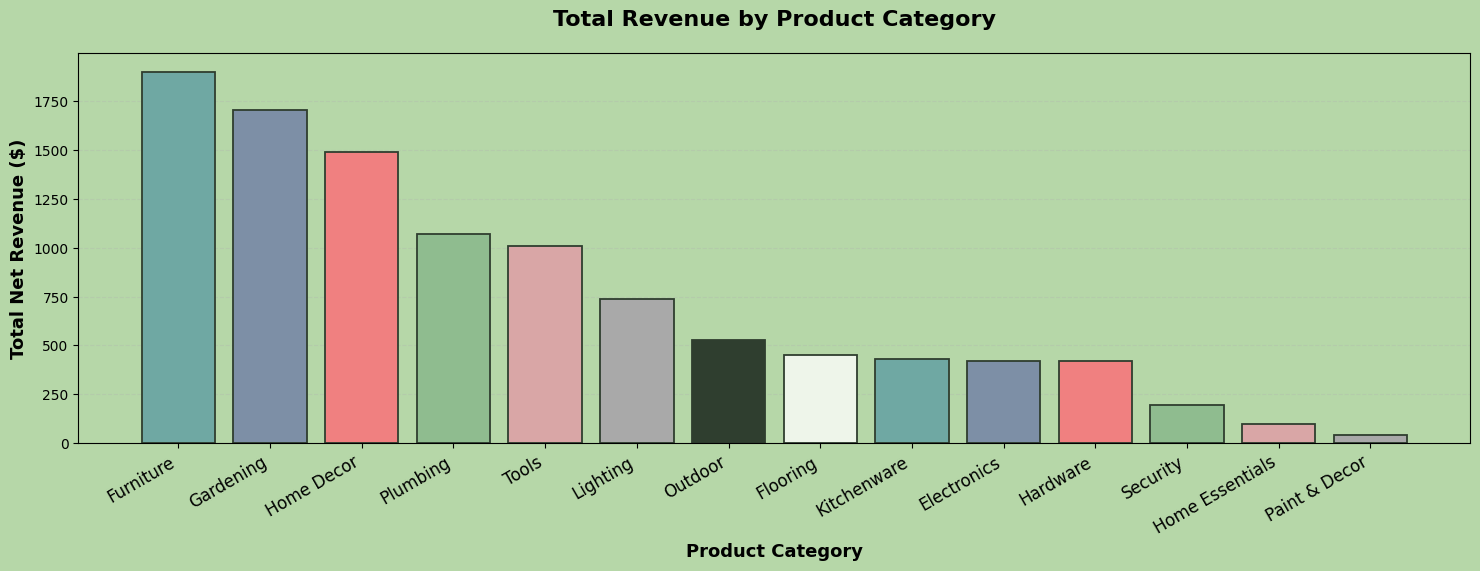

Total Revenue by Product Category:
Product Category
Furniture          1898.13
Gardening          1702.83
Home Decor         1489.86
Plumbing           1069.50
Tools              1008.09
Lighting            739.35
Outdoor             526.38
Flooring            453.84
Kitchenware         431.52
Electronics         423.15
Hardware            418.50
Security            195.30
Home Essentials      97.65
Paint & Decor        44.90
Name: Net Revenue, dtype: float64


In [277]:
# Calculate total revenue by product category
category_revenue = df.groupby('Product Category')['Net Revenue'].sum().sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 6))

# Create vertical bar chart
bars = ax.bar(
    category_revenue.index,
    category_revenue.values,
    color=colorset[:len(category_revenue)],
    edgecolor='#2f3e2f',
    linewidth=1.3
)

# Customize the plot
ax.set_xlabel('Product Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Net Revenue ($)', fontsize=13, fontweight='bold')
ax.set_title('Total Revenue by Product Category', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels if needed
ax.set_xticklabels(category_revenue.index, rotation=30, ha='right', fontsize=12)

# Background styling
fig.patch.set_facecolor(f'#{bgcolor}')
ax.set_facecolor(f'#{bgcolor}')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.25)
plt.show()

# Display the data
print("Total Revenue by Product Category:")
print(category_revenue)
